<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [125]:
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [126]:
# A:
list_x = [1,2,3,4,5,6,7,8,9,10]
list_y = [.5,.7,.8,.99,1,1.4,1.8,2.1,2.4,2.9]
dict = {'X':list_x,'Y':list_y}
dict['X']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [127]:
# A:
pre_df = pd.DataFrame(dict)
pre_df.head()

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [128]:
x_prime = [x+10 for x in list_x]
print(x_prime)
y_prime = [y+3 for y in list_y]
print(y_prime)
dict_2 = {'X': x_prime, 'Y': y_prime}
new_data = pd.DataFrame(dict_2)

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3.5, 3.7, 3.8, 3.99, 4, 4.4, 4.8, 5.1, 5.4, 5.9]


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [129]:
df = pd.concat([pre_df,new_data], axis=0, ignore_index=1)
df.head(20)

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

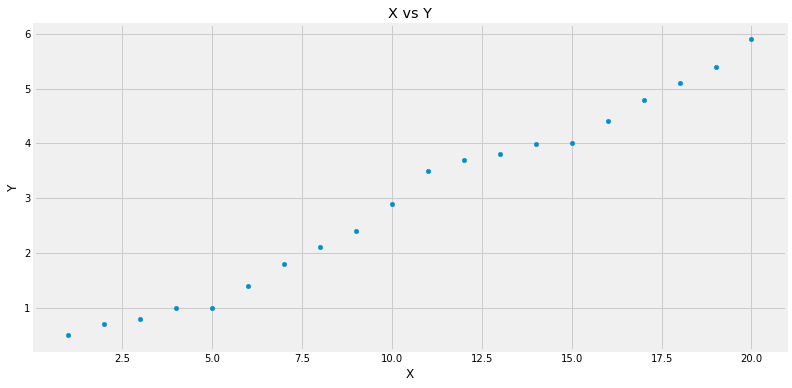

In [130]:
df.plot(x='X',y='Y',kind='scatter', title='X vs Y', figsize=(12,6))

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [131]:
mod = sm.OLS(df['Y'],df['X'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              5315.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                    9.96e-25
Time:                        16:10:16   Log-Likelihood:                          3.4938
No. Observations:                  20   AIC:                                     -4.988
Df Residuals:                      19   BIC:                                     -3.992
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [132]:
# A:0.996

### What is the p-value for your X?

In [133]:
# A:72.906

### What is the intercept?

In [134]:
from sklearn.linear_model import LinearRegression
feature_cols = ['X']
X = df[feature_cols]
y = df.Y
linreg = LinearRegression()
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)

-0.08568421052631647
[0.28996992]


### Using the above, write the equation for our model

In [135]:
# A:  y = 0.28996992*x + -0.0856842105263147

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [136]:
0.28996992 * 20 + -0.0856842105263147

5.713714189473684

In [137]:
0.28996992 * 21 + -0.0856842105263147

6.003684109473685

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [138]:
ypred = res.predict(X)
print(ypred)

0     0.283700
1     0.567401
2     0.851101
3     1.134801
4     1.418502
5     1.702202
6     1.985902
7     2.269603
8     2.553303
9     2.837003
10    3.120704
11    3.404404
12    3.688105
13    3.971805
14    4.255505
15    4.539206
16    4.822906
17    5.106606
18    5.390307
19    5.674007
dtype: float64


### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [139]:
y_resids = df.Y - ypred
y_squares = y_resids ** 2
sum(y_squares)

0.825702299651568

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [160]:
y_pred = pd.DataFrame((ypred), columns = ['y_pred'])
y_pred.head()

,y_pred
0,0.283700
1,0.567401
2,0.851101
3,1.134801
4,1.418502


In [168]:
y_orig = pd.DataFrame(df['Y'])
y_orig.head()

,Y
0,0.50
1,0.70
2,0.80
3,0.99
4,1.00


In [164]:
df_new = pd.concat([y_orig,y_pred], axis=1)
df_new.head()

,Y,y_pred
0,0.50,0.283700
1,0.70,0.567401
2,0.80,0.851101
3,0.99,1.134801
4,1.00,1.418502


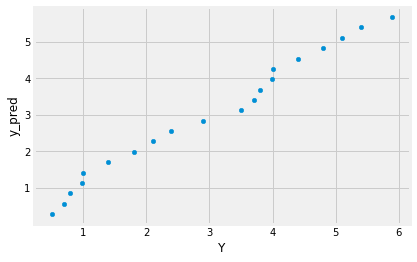

In [170]:
df_new.plot(x='Y',y='y_pred',kind='scatter')

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [173]:
poly = PolynomialFeatures(5)
poly.fit_transform(X)

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904900e+04],
       [1.000000e+00, 1.000000e+01, 1.000000e+02, 1.000000e+03,
        1.000000e+04, 1.000

In [176]:
poly_feats = poly.fit_transform(X)
type(poly_feats)

numpy.ndarray

In [179]:
poly_X = pd.DataFrame(poly_feats)
poly_X.head()

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0


In [185]:
pdf =pd.merge(df['Y'], poly_X, left_index=True, right_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.40,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.80,1.0,7.0,49.0,343.0,2401.0,16807.0
7,2.10,1.0,8.0,64.0,512.0,4096.0,32768.0
8,2.40,1.0,9.0,81.0,729.0,6561.0,59049.0
9,2.90,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Using statsmodels as before, fit this new model and save it as poly_results

In [188]:
endog = pdf['Y']
model = sm.OLS(endog,poly_feats)
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     572.4
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.15e-15
Time:                        17:43:33   Log-Likelihood:                 14.451
No. Observations:                  20   AIC:                            -16.90
Df Residuals:                      14   BIC:                            -10.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5702      0.312      1.827      0.0

### Print out the model's predictions and save them as poly_yhat

In [190]:
poly_yhat = results.predict(poly_feats)
poly_yhat

array([0.57452332, 0.62383537, 0.73329636, 0.9086668 , 1.14791445,
       1.44283096, 1.78064841, 2.14565598, 2.52081649, 2.88938301,
       3.23651549, 3.55089731, 3.82635191, 4.06345936, 4.27117298,
       4.46843594, 4.68579783, 4.96703129, 5.37074858, 5.97201818])

### Calculate the SSE

In [195]:
from sklearn import metrics

print('MSE:', metrics.mean_squared_error(df['Y'],poly_yhat))

MSE: 0.01380152253637476


### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: